In [69]:
from logging import WARNING, INFO
from typing import Callable, Dict, List, Optional, Tuple, Union
import numpy as np
import yaml
from pathlib import Path
import matplotlib.pyplot as plt

In [70]:
run_name = 'graph_8_32'
save_path = 'plots/'
file_path = '../no_pretrain/' + run_name #NEED TO READ ALL FILES
num_agents = 10

In [71]:
tplgys = []
raw_tplgys = []
for i in range(5):
    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_pool.out', mode = 'r', encoding = 'utf-8-sig')
    lines = file.readlines()
    tplgys.append(lines)
    file.close()

    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_raw.out', mode = 'r', encoding = 'utf-8-sig')
    r_lines = file.readlines()
    raw_tplgys.append(r_lines)
    file.close()

In [72]:
tplgy_ID = []
loss = []
acc = []

for tplgy in tplgys:
    tmp1 = []
    tmp2 = []
    tmp3 = []
    for line in tplgy:
        tmp1.append(int(line.split(' ')[1]))
        tmp2.append(float(line.split(' ')[-3]))
        tmp3.append(float(line.split(' ')[-1]))
    tplgy_ID.append(tmp1)
    loss.append(tmp2)
    acc.append(tmp3)
print(tplgy_ID)
print(loss)
print(acc)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
[[1246.7286739349365, 118.11655616760254, 117.41835075616837, 119.10515850782394, 1067.210717201233, 113.98465991020203, 116.33360040187836, 71.88309109210968, 110.33309185504913, 2576.050230026245], [78.47978866100311, 78.81685650348663, 77.92621058225632, 78.02079904079437, 159.27177965641022, 59.71214273571968, 61.86595457792282, 66.65487396717072, 110.7242900133133, 1914.6783561706543], [60.64439231157303, 59.817784547805786, 59.9925931096077, 59.37041732668877, 59.93995597958565, 60.42940205335617, 60.673622757196426, 61.68707227706909, 116.33574914932251, 2810.599054336548], [61.057584434747696, 60.936553955078125, 60.762115478515625, 60.614015102386475, 61.05098092556, 60.76218396425247, 61.20573157072067, 62.04774820804596, 106.5735839009285, 1746.5717372894287], [58.646732062101364, 58.725974053144455, 58.6547614336013

In [73]:
exec_times = []
for tplgy in raw_tplgys:
    exec_times.append(float(tplgy[-1].split(' ')[1])/60)
print(exec_times)

[186.34946989218395, 190.90210414330164, 198.63103782733282, 198.85749402046204, 164.90372228225073]


In [74]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], acc[0], '.')
# axs[0, 0].set_ylim(0, 0.8)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], acc[1], '.')
# axs[0, 1].set_ylim(0, 0.8)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], acc[2], '.')
# axs[1, 0].set_ylim(0, 0.8)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], acc[3], '.')
# axs[1, 1].set_ylim(0, 0.8)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], acc[4], '.')
# axs[2, 0].set_ylim(0, 0.8)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Acc')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_acc.pdf')

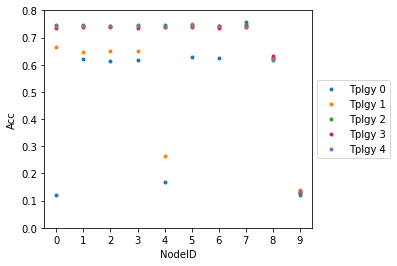

In [75]:
plt.plot(tplgy_ID[0], acc[0], '.')
plt.plot(tplgy_ID[1], acc[1], '.')
plt.plot(tplgy_ID[2], acc[2], '.')
plt.plot(tplgy_ID[3], acc[3], '.')
plt.plot(tplgy_ID[4], acc[4], '.')
plt.ylim(0, 0.8)
x = np.arange(0, num_agents, 1)
plt.xticks(x)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Acc')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(save_path+run_name+'_summarized_acc.pdf')

In [76]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], loss[0], '.')
# axs[0, 0].set_ylim(50, 200)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], loss[1], '.')
# axs[0, 1].set_ylim(50, 200)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], loss[2], '.')
# axs[1, 0].set_ylim(50, 200)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], loss[3], '.')
# axs[1, 1].set_ylim(50, 200)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], loss[4], '.')
# axs[2, 0].set_ylim(50, 200)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Loss')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_loss.pdf')

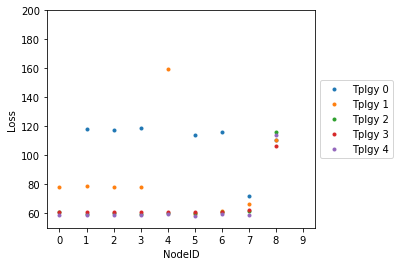

In [77]:
plt.plot(tplgy_ID[0], loss[0], '.')
plt.plot(tplgy_ID[1], loss[1], '.')
plt.plot(tplgy_ID[2], loss[2], '.')
plt.plot(tplgy_ID[3], loss[3], '.')
plt.plot(tplgy_ID[4], loss[4], '.')
x = np.arange(0, num_agents, 1)
plt.xticks(x)
plt.ylim(50, 200)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Loss')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(save_path+run_name+'_summarized_loss.pdf')

In [78]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy = []
num_rounds = 256
for tplgy in raw_tplgys:
    tmp = tplgy[2].split()
    tmp_loss = []
    for i in range(1,257):
        tmp_loss.append((float(tmp[2*i][:-1])))
    loss_per_tplgy.append(tmp_loss)

In [79]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy_by_agent = []
num_rounds = 256
for loss_tplgy in loss_per_tplgy:
    loss_per_agent = []
    for i in range(num_agents):
        tmp_loss = []
        for j in range(1+i, num_rounds, num_agents):
            tmp_loss.append((loss_tplgy[j]))
        loss_per_agent.append(tmp_loss)
    loss_per_tplgy_by_agent.append(loss_per_agent)

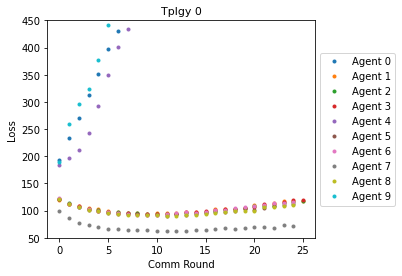

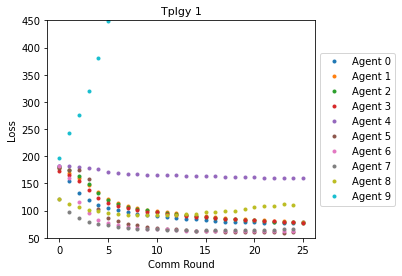

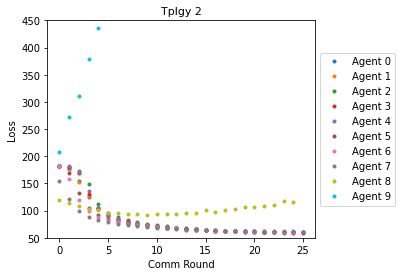

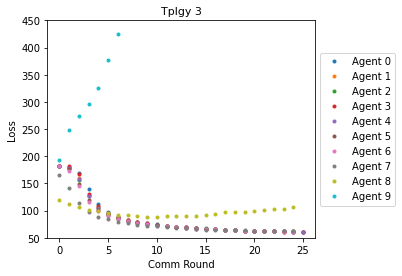

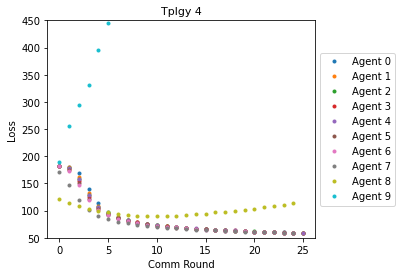

In [80]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT

for i in range(5):
    plt.plot(loss_per_tplgy_by_agent[i][0], '.')
    plt.plot(loss_per_tplgy_by_agent[i][1], '.')
    plt.plot(loss_per_tplgy_by_agent[i][2], '.')
    plt.plot(loss_per_tplgy_by_agent[i][3], '.')
    plt.plot(loss_per_tplgy_by_agent[i][4], '.')
    plt.plot(loss_per_tplgy_by_agent[i][5], '.')
    plt.plot(loss_per_tplgy_by_agent[i][6], '.')
    plt.plot(loss_per_tplgy_by_agent[i][7], '.')
    plt.plot(loss_per_tplgy_by_agent[i][8], '.')
    plt.plot(loss_per_tplgy_by_agent[i][9], '.')
    plt.ylim(50, 450)
    plt.xlabel('Comm Round')
    plt.ylabel('Loss')
    plt.title("Tplgy "+str(i), fontsize=11)
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(['Agent 0', 'Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Agent 6', 'Agent 7', 'Agent 8', 'Agent 9'], loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.savefig(save_path+str(i)+'_'+run_name+'_raw_summarized_loss.pdf')
    plt.show()


In [81]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
# for i in range(5):
#     fig, axs = plt.subplots(5, 2)
#     axs[0, 0].plot(loss_per_tplgy_by_agent[i][0], '.')
#     axs[0, 0].set_ylim(50, 450)
#     axs[0, 0].set_title("Agent 0", fontsize=9)
#     axs[0, 1].plot(loss_per_tplgy_by_agent[i][1], '.')
#     axs[0, 1].set_ylim(50, 450)
#     axs[0, 1].set_title("Agent 1", fontsize=9)
#     axs[1, 0].plot(loss_per_tplgy_by_agent[i][2], '.')
#     axs[1, 0].set_ylim(50, 450)
#     axs[1, 0].set_title("Agent 2", fontsize=9)
#     axs[1, 1].plot(loss_per_tplgy_by_agent[i][3], '.')
#     axs[1, 1].set_ylim(50, 450)
#     axs[1, 1].set_title("Agent 3", fontsize=9)
#     axs[2, 0].plot(loss_per_tplgy_by_agent[i][4], '.')
#     axs[2, 0].set_ylim(50, 450)
#     axs[2, 0].set_title("Agent 4", fontsize=9)
#     axs[2, 1].plot(loss_per_tplgy_by_agent[i][5], '.')
#     axs[2, 1].set_ylim(50, 450)
#     axs[2, 1].set_title("Agent 5", fontsize=9)
#     axs[3, 0].plot(loss_per_tplgy_by_agent[i][6], '.')
#     axs[3, 0].set_ylim(50, 450)
#     axs[3, 0].set_title("Agent 6", fontsize=9)
#     axs[3, 1].plot(loss_per_tplgy_by_agent[i][7], '.')
#     axs[3, 1].set_ylim(50, 450)
#     axs[3, 1].set_title("Agent 7", fontsize=9)
#     axs[4, 0].plot(loss_per_tplgy_by_agent[i][8], '.')
#     axs[4, 0].set_ylim(50, 450)
#     axs[4, 0].set_title("Agent 8", fontsize=9)
#     axs[4, 1].plot(loss_per_tplgy_by_agent[i][9], '.')
#     axs[4, 1].set_ylim(50, 450)
#     axs[4, 1].set_title("Agent 9", fontsize=9)
# 
#     for ax in axs.flat:
#         ax.set(xlabel='Comm round', ylabel='Loss')
#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
#     plt.savefig(save_path+run_name+'_evol_loss_tplgy' + str(i) + '.pdf')

In [82]:
print(len(loss_per_tplgy_by_agent[4][8]))

25


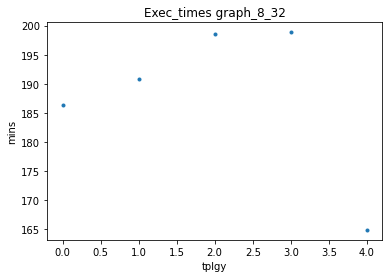

In [83]:
plt.plot(range(5), exec_times, '.')
plt.xlabel("tplgy")
plt.ylabel("mins")
plt.title("Exec_times " + run_name)
plt.savefig(save_path+run_name+'_exec_times.pdf')
plt.show()

In [84]:
# plt.plot(tplgy_ID[0], acc[0], 'o')
# plt.ylim(0.1, 0.6)
# plt.title("ACC per tplgy " + run_name)
# plt.show()

In [85]:
# plt.plot(tplgy_ID[0], loss[0], 'o')
# plt.ylim(100, 300)
# plt.title("Loss per tplgy " + run_name)
# plt.show()